<a href="https://colab.research.google.com/github/Jaya-Rohith-Vemula/automobile-price-prediction/blob/master/automobile_price_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [0]:
from google.colab import files

uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [0]:
for train in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=train, length=len(uploaded[train])))

User uploaded file "Automobile_data.csv" with length 25070 bytes


In [0]:
import pandas as pd    
from io import BytesIO

df = pd.read_csv(BytesIO(uploaded[train]), encoding='latin-1')

In [0]:
cols = list(df.columns.values)
print(cols)


['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [0]:
df.head()  

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [0]:
df.describe() 

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [0]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [0]:
object_labels = list(df.select_dtypes(include=['object']).columns.values)

In [0]:
# list of columns with misses
# 'num-of-doors' is categorial, all others are numerical
for col in df.columns:
    if '?' in df[col].unique():
        print(col)

normalized-losses
num-of-doors
bore
stroke
horsepower
peak-rpm
price


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [0]:
# fill numerical values with average
from sklearn.preprocessing import Imputer
df = df.replace('?', 'NaN')
imp = Imputer(missing_values='NaN', strategy='mean' )
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = imp.fit_transform(df[['normalized-losses',
                                                                                                      'bore','stroke','horsepower','peak-rpm','price']])
df.head()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [0]:
df['num-of-doors'].value_counts()

four    114
two      89
NaN       2
Name: num-of-doors, dtype: int64

In [0]:
# replace misses in num of doors with the most likely value
df = df.replace('NaN', 'four')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


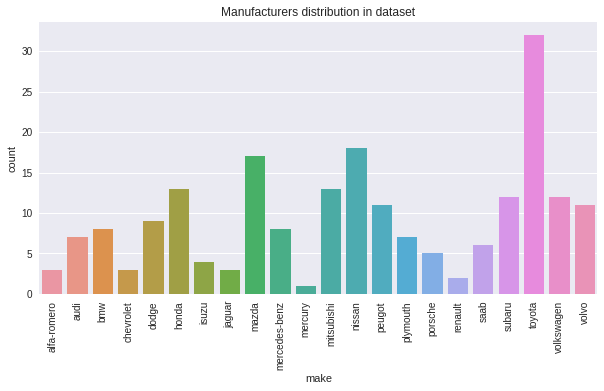

In [0]:
# model distribution among producers
plt.figure(figsize=(10, 5))
sns.countplot(x='make', data=df)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')
plt.show()

In [0]:
# Categorial columns list
category_columns = [col for col in df.columns if df.dtypes[col] == 'object']
print(category_columns)

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [0]:
# Generate new features
df['volume'] = df['height'] * df['width'] * df['length']
df['density'] = df['curb-weight'] / df['volume']
df['power-per-volume'] = df['horsepower'] / df['engine-size']
# There also can be generated other parameters describing engine parameters


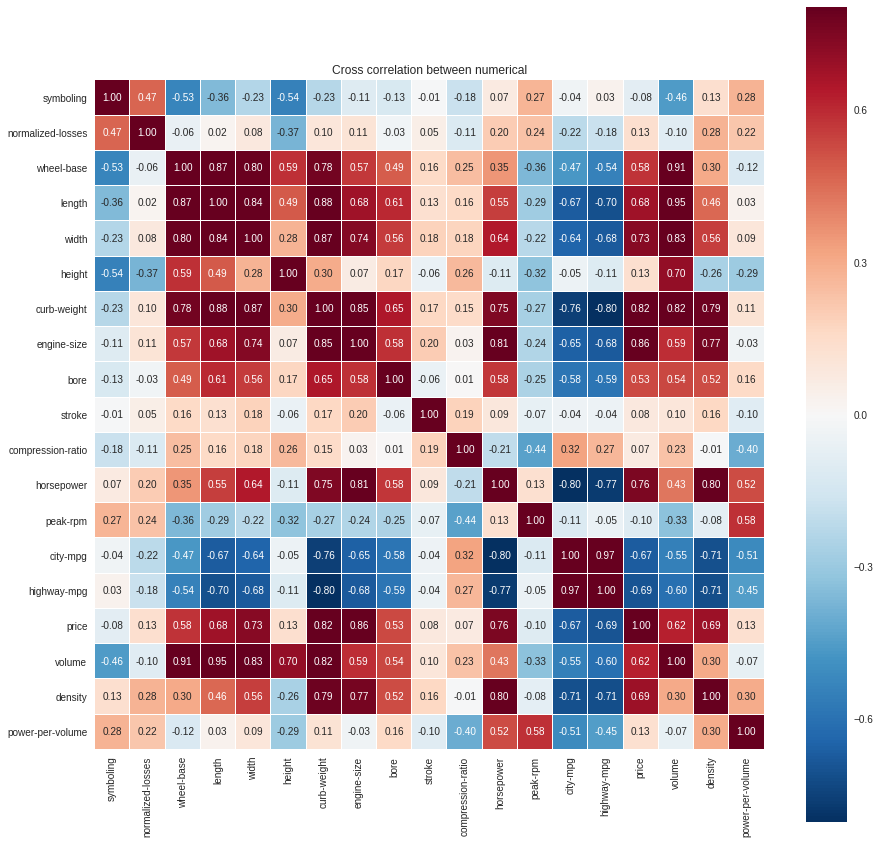

In [0]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

In [0]:
# Replace categorial columns by dummy encoded
Data_category = pd.get_dummies(df[category_columns], drop_first=True)
df1 = pd.concat([df, Data_category], axis=1)
df1.drop(category_columns, axis=1, inplace=True)
df1.head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0


In [0]:
# replace '-' in features names with '_'
#Building a linear model
df2 = df1.copy()
names = []
for name in df2.columns:
    names.append(name.replace('-', '_'))

df2.columns = names

In [0]:
# Normalize data and split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
nor = Normalizer()
df3 = nor.fit_transform(df2)

col = []
for i in df1.columns:
    col.append(i.replace('-', '_'))
    
df3 = pd.DataFrame(df3 , columns  = col)

Y = df3['price']
X = df3.drop('price',axis =1)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=42)


In [0]:
# lastly let's just run simple regression on all variables
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


regressor = LinearRegression()
lm_2 = regressor.fit(xtrain, ytrain)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pred_train_y = regressor.predict(xtrain)
pred_test_y = regressor.predict(xtest)
cv_score = np.mean(cross_val_score(lm_2, X, Y, cv=cv, scoring='r2'))

print ('%8s %8s %8s %8s' % ('Train R^2','Test R^2', 'CV R^2', 'MSE'))
print('%.6f %.6f %.6f %.6f'%  (lm_2.score(xtrain,ytrain), lm_2.score(xtest,ytest), cv_score,
                               np.mean((pred_test_y -ytest)**2)))


Train R^2 Test R^2   CV R^2      MSE
0.992440 0.956407 0.957060 0.000005
